# Feature information

File: raw_titles.csv

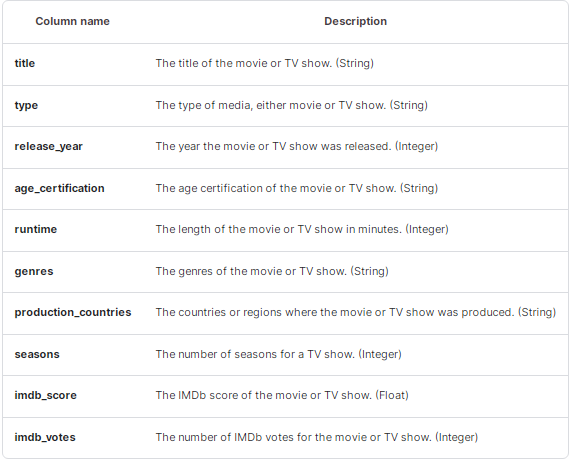

File: Best Shows Netflix.csv

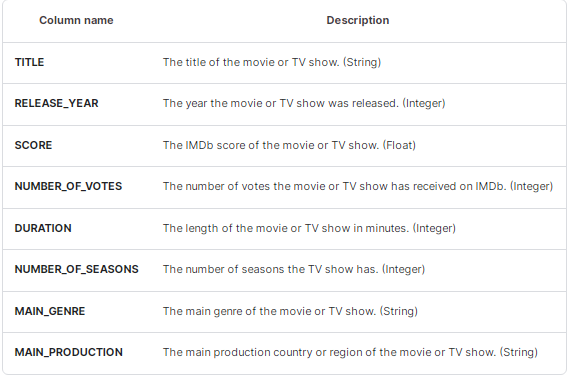

---

#### Modules

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

#### Reading files

In [2]:
# Adding path for datasets
p_BMbY = 'data/BMbY.csv' # best movies by year
p_BM = 'data/BM.csv' # best movies
p_BSbY = 'data/BSbY.csv' #best shows by year
p_BS = 'data/BS.csv'
p_raw_creds = 'data/raw_credits.csv'
p_raw_titles = 'data/raw_titles.csv'

In [3]:
BMbY = pd.read_csv(p_BMbY, index_col=False)
BM = pd.read_csv(p_BM, index_col=False)
BSbY = pd.read_csv(p_BSbY, index_col=False)
BS = pd.read_csv(p_BS, index_col=False)
raw_creds = pd.read_csv(p_raw_creds, index_col=False)
raw_titles = pd.read_csv(p_raw_titles, index_col=False)

# EDA

In [4]:
print('BMbY','\n',BMbY.head(1))
print('BM','\n',BM.head(1))
print('BSbY','\n',BSbY.head(1))
print('BS','\n',BS.head(1))
print('raw_creds','\n',raw_creds.head(1))
print('raw_titles','\n',raw_titles.head(1))

BMbY 
    index            TITLE  RELEASE_YEAR  SCORE MAIN_GENRE MAIN_PRODUCTION
0      0  White Christmas          1954    7.5    romance              US
BM 
    index                                     TITLE  RELEASE_YEAR  SCORE  \
0      0  David Attenborough: A Life on Our Planet          2020    9.0   

   NUMBER_OF_VOTES  DURATION   MAIN_GENRE MAIN_PRODUCTION  
0            31180        83  documentary              GB  
BSbY 
    index                         TITLE  RELEASE_YEAR  SCORE  \
0      0  Monty Python's Flying Circus          1969    8.8   

   NUMBER_OF_SEASONS MAIN_GENRE MAIN_PRODUCTION  
0                  4     comedy              GB  
BS 
    index         TITLE  RELEASE_YEAR  SCORE  NUMBER_OF_VOTES  DURATION  \
0      0  Breaking Bad          2008    9.5          1727694        48   

   NUMBER_OF_SEASONS MAIN_GENRE MAIN_PRODUCTION  
0                  5      drama              US  
raw_creds 
    index  person_id       id            name      character   role
0 

#

##### removing null rows
##### index column is completely unnecessary, we must remove it

In [5]:
datasets = [BMbY, BM, BSbY, BS]

# use a copy of the df to prevent NoneType AttributeError:
remove_null_rows = lambda x: x.dropna(axis=0).copy()
tables = list(map(remove_null_rows, datasets))

# Removing index column
remove_index = lambda x: x.drop(columns=['index'], axis=1, inplace=True)
datasets = list(map(remove_index, datasets))

In [6]:
print('BMbY','\n',BMbY.sample(3))
print('--'*40)
print('BM','\n',BM.sample(3))
print('--'*40)
print('BSbY','\n',BSbY.sample(3))
print('--'*40)
print('BS','\n',BS.sample(3))
print('--'*40)
print('raw_creds','\n',raw_creds.sample(3))
print('--'*40)
print('raw_titles','\n',raw_titles.head(3))

BMbY 
                   TITLE  RELEASE_YEAR  SCORE MAIN_GENRE MAIN_PRODUCTION
29             Big Fish          2003    8.0      drama              US
32      Rang De Basanti          2006    8.1     comedy              IN
48  The Tinder Swindler          2022    7.2      crime              GB
--------------------------------------------------------------------------------
BM 
                    TITLE  RELEASE_YEAR  SCORE  NUMBER_OF_VOTES  DURATION  \
5    Saving Private Ryan          1998    8.6          1346020       169   
187                   42          2013    7.5            93314       128   
105         Nightcrawler          2014    7.8           523686       118   

    MAIN_GENRE MAIN_PRODUCTION  
5        drama              US  
187      drama              US  
105      crime              US  
--------------------------------------------------------------------------------
BSbY 
                TITLE  RELEASE_YEAR  SCORE  NUMBER_OF_SEASONS MAIN_GENRE  \
15            iCarl

### Which are the best movies released in each year 

In [7]:
BMbY.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

In [8]:
release_years = BMbY['RELEASE_YEAR'].unique()

results = [] # to then pass it as DataFrame
for year in release_years:
    filtered_df = BMbY[BMbY["RELEASE_YEAR"] == year] #one movie per year
    max_score = filtered_df["SCORE"].max()
    title = filtered_df[filtered_df["SCORE"] == max_score][["SCORE","RELEASE_YEAR","TITLE"]]
    
    results.append([max_score, year, title.TITLE.values[0]])
    
results_df = pd.DataFrame(results, columns=['SCORE', 'RELEASE_YEAR', 'TITLE'])
print(results_df)

    SCORE  RELEASE_YEAR                                           TITLE
0     7.5          1954                                 White Christmas
1     7.5          1961                            The Guns of Navarone
2     7.8          1964                                    My Fair Lady
3     7.7          1967                                Bonnie and Clyde
4     7.7          1971                                     Dirty Harry
5     8.1          1973                                    The Exorcist
6     8.2          1975                 Monty Python and the Holy Grail
7     8.3          1976                                     Taxi Driver
8     8.0          1979                                   Life of Brian
9     5.8          1980                                 The Blue Lagoon
10    6.6          1982                                           Annie
11    6.7          1983                                       Christine
12    8.3          1984                     Once Upon a Time in 

### What are the most seen genres per year

In [11]:
BM.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')

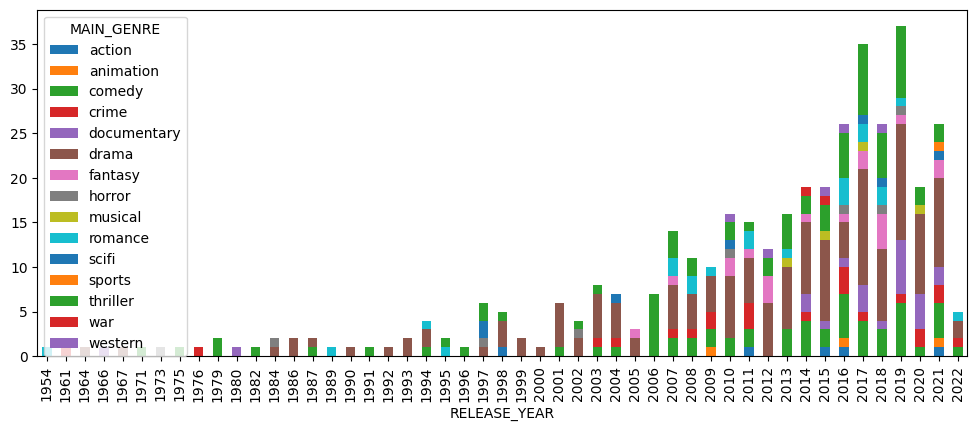

In [20]:
# pass to categorical variable
BM['MAIN_GENRE'] = pd.Categorical(BM['MAIN_GENRE'])

BM_plot = BM.groupby(['RELEASE_YEAR', 'MAIN_GENRE'])['MAIN_GENRE'].count().unstack().fillna(0)
BM_plot.plot(kind='bar', stacked=True, figsize=(12,4.5))
plt.show()